# Dissertation Project - Convolutional Visual Reasoning


# Rudiments Check

In [ ]:
import os
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from google.colab import drive
from google.colab import runtime
from PIL import Image
drive.mount('/content/drive')

Mounted at /content/drive


# Downloading the Dataset

In [ ]:
!rm -rf CLEVR_v1
!wget https://dl.fbaipublicfiles.com/clevr/CLEVR_v1.0.zip
!unzip CLEVR_v1.0.zip
!mv CLEVR_v1.0 CLEVR_v1
!mkdir CLEVR_v1/data
!mv CLEVR_v1/questions/* CLEVR_v1/data/
!rm CLEVR_v1.0.zip

Streaming output truncated to the last 5000 lines.
  inflating: CLEVR_v1.0/images/train/CLEVR_train_041020.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_068755.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_008504.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_057028.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_057464.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_049590.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_010322.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_038692.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_047594.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_014228.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_010552.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_030689.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_044484.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_026813.png  
  inflating: CLEVR_v1.0/images/train/CLEVR_train_014422.png  
  inflating: CLEVR_

Downloaded The code files and uploaded it to My Google Drive in the same hierarchy mentioned in the Github repository. optionally, I have also uploaded the raw images as I'm using them to generate GIF images as the output

# Extracting Features from the dataset

In [ ]:
# Caution! this step takes a lot of time as we have 77 Gigabytes of data to be uploaded in the drive
%run /content/drive/MyDrive/CLEVR_v1.0/extract_features.py --input_image_dir /content/CLEVR_v1/images/train --output_h5_file /content/drive/MyDrive/CLEVR_v1.0/CLEVR_v1/data/train.h5 --batch_size 32
%run /content/drive/MyDrive/CLEVR_v1.0/extract_features.py --input_image_dir /content/CLEVR_v1/images/val --output_h5_file /content/drive/MyDrive/CLEVR_v1.0/CLEVR_v1/data/val.h5 --batch_size 32
%run /content/drive/MyDrive/CLEVR_v1.0/extract_features.py --input_image_dir /content/CLEVR_v1/images/test --output_h5_file /content/drive/MyDrive/CLEVR_v1.0/CLEVR_v1/data/test.h5 --batch_size 32

('/content/CLEVR_v1/images/test/CLEVR_test_000000.png', 0)
('/content/CLEVR_v1/images/test/CLEVR_test_014999.png', 14999)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:02<00:00, 77.2MB/s]


Processed 32 / 15000 images
Processed 64 / 15000 images
Processed 96 / 15000 images
Processed 128 / 15000 images
Processed 160 / 15000 images
Processed 192 / 15000 images
Processed 224 / 15000 images
Processed 256 / 15000 images
Processed 288 / 15000 images
Processed 320 / 15000 images
Processed 352 / 15000 images
Processed 384 / 15000 images
Processed 416 / 15000 images
Processed 448 / 15000 images
Processed 480 / 15000 images
Processed 512 / 15000 images
Processed 544 / 15000 images
Processed 576 / 15000 images
Processed 608 / 15000 images
Processed 640 / 15000 images
Processed 672 / 15000 images
Processed 704 / 15000 images
Processed 736 / 15000 images
Processed 768 / 15000 images
Processed 800 / 15000 images
Processed 832 / 15000 images
Processed 864 / 15000 images
Processed 896 / 15000 images
Processed 928 / 15000 images
Processed 960 / 15000 images
Processed 992 / 15000 images
Processed 1024 / 15000 images
Processed 1056 / 15000 images
Processed 1088 / 15000 images
Processed 1120

In [ ]:
# Changing the current directory to the CLEVR_v1.0 Directory

In [ ]:
%cd /content/drive/MyDrive/CLEVR_v1.0/

/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0


In [ ]:
def image_split(Expfolder,ImgId,rw,cm):
  directory_path = './preds/{}/'.format(Expfolder)
  file_list = os.listdir(directory_path)
  image_paths = []
  for filename in file_list:
    if("val{}Img".format(ImgId) in filename):
      file_path = os.path.join(directory_path, filename)
      if os.path.isfile(file_path):
        image_paths.append(file_path)
  file_dic = {}
  for i in image_paths:
    file_dic[i] = int(i.split("Img_")[-1].split(".png")[0])
  sorted_dict = dict(sorted(file_dic.items(), key=lambda item: item[1]))
  image_paths = list(sorted_dict.keys())
  images = [Image.open(path) for path in image_paths]
  rows = rw
  cols = cm
  fig, axes = plt.subplots(rows, cols, figsize=(18, 9))
  for i, ax in enumerate(axes.flat):
      if i < len(image_paths):
          img = Image.open(image_paths[i])
          ax.imshow(img)
          ax.axis('off')
  plt.figure()
  matrix_path = './preds/{}/val{}text_RIGHT.png'.format(Expfolder,ImgId)  # Replace with the actual image path
  matrix = imread(matrix_path)
  plt.imshow(matrix)
  plt.axis('off')
  plt.show()

# Model Variation 1
##### Experiment Name = clevrExperiment
##### Net Length = 4
##### Number of Epochs = 25
##### Argument file = args.txt
#### The Argument files are explained as a section in the last

## Training model 1

In [ ]:
# The parameter -r is used to restore from previously trained epoch until the epoch number mentioned as an argument

In [ ]:
%run main.py --expName "clevrExperiment" --train -r --testedNum 10000 --epochs 25 --netLength 4 @configs/args.txt

Instructions for updating:
non-resource variables are not supported in the long term


Preprocess data...
Loading data...
took 80.34 seconds
Loading word vectors...
0
{'<PAD>': 0, '<UNK>': 1, '<START>': 2, '<END>': 3, 'are': 4, 'there': 5, 'more': 6, 'big': 7, 'green': 8, 'things': 9, 'than': 10, 'large': 11, 'purple': 12, 'shiny': 13, 'cubes': 14, 'how': 15, 'many': 16, 'other': 17, 'of': 18, 'the': 19, 'same': 20, 'shape': 21, 'as': 22, 'tiny': 23, 'cyan': 24, 'matte': 25, 'object': 26, 'is': 27, 'color': 28, 'sphere': 29, 'cube': 30, 'what': 31, 'material': 32, 'that': 33, 'right': 34, 'brown': 35, 'cylinder': 36, 'and': 37, 'left': 38, 'gray': 39, 'on': 40, 'side': 41, 'small': 42, 'rubber': 43, 'behind': 44, 'thing': 45, 'to': 46, 'metallic': 47, 'size': 48, 'any': 49, 'have': 50, 'block': 51, 'blue': 52, 'yellow': 53, 'a': 54, ';': 55, 'it': 56, 'ball': 57, 'its': 58, 'in': 59, 'front': 60, 'does': 61, 'number': 62, 'red': 63, 'spheres': 64, 'made': 65, 'metal': 66, 'cylinders': 67, 'both': 68, 'balls': 69, 'or': 70, 'blocks': 71, 'objects': 72, 'visible': 73, 'ano

/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0/ops.py:771: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = cells[cellType](hDim, reuse=tf.AUTO_REUSE, activation = activation)


took 4.49 seconds
Restoring epoch 23 and lr 0.0001
Restoring weights
Training epoch 24...
eb 24,3000 (191971 / 699989), t = 2.62 (0.00+0.32), lr 0.0001, l = 0.6837, a = 0.6719, avL = 0.5644, avA = 0.7074, g = 7.3234, emL = 0.5730, emA = 0.7040; clevrExperiment
saving weights
eb 24,6000 (383850 / 699989), t = 2.73 (0.00+0.31), lr 0.0001, l = 0.5487, a = 0.6875, avL = 0.5694, avA = 0.7047, g = 2.9281, emL = 0.5696, emA = 0.7011; clevrExperiment
saving weights
eb 24,9000 (575710 / 699989), t = 2.64 (0.00+0.31), lr 0.0001, l = 0.5176, a = 0.7031, avL = 0.5712, avA = 0.7034, g = 1.3113, emL = 0.5589, emA = 0.7048; clevrExperiment
saving weights

Restoring EMA weights


Restoring standard weights

took 7452.08 seconds
Training Loss: 0.5721308887433673, Training accuracy: 0.7029981899715567
Training EMA Loss: 0.526996657127444, Training EMA accuracy: 0.7168
Validation Loss: 0.14055107410165393, Validation accuracy: 0.9539
Training epoch 25...
eb 25,3000 (192036 / 699989), t = 2.82 (0.00+0.30)

### Code for creating predictions and attention maps

In [ ]:
%run main.py --expName "clevrExperiment" --finalTest --testedNum 30 --netLength 4 -r --getPreds --getAtt @configs/args.txt

## Finding out a predicted value and plotting attention maps

/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0/visualization.py:92: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=cmap,override_builtin=True)
/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0/visualization.py:92: UserWarning: Overwriting the cmap 'custom' that was already in the registry.
  plt.register_cmap(cmap=cmap,override_builtin=True)
/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0/visualization.py:147: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(inImgName(instance["imageId"]))


42
id:60425
img:6043
Q:What is the blue cube made of?
G:rubber
P:rubber
RIGHT


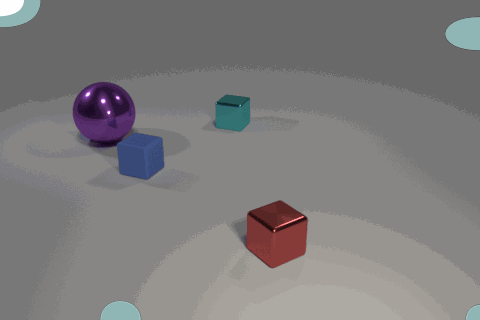

________________________________________________________________________


<ipython-input-44-5a48aae2344d>:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  matrix = imread(matrix_path)


<Figure size 640x480 with 0 Axes>

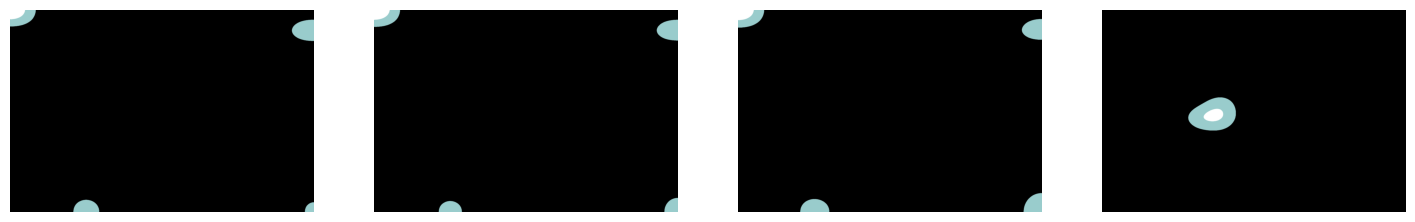

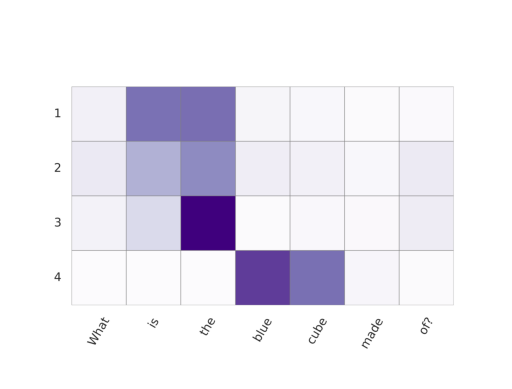

<Figure size 640x480 with 0 Axes>

In [ ]:
%run visualization.py --expName "clevrExperiment" --tier val --instances 42
plt.clf()
image_split('clevrExperiment','60425',1,4)
# Display the subplots
plt.tight_layout()
plt.show()

**Since we've declared the net length parameter as 4, we only have 4 attention maps i.e 4 iterations in the MAC cell**

**In this example, The question is simple and straight forward. It does not invole any other shapes or features from other objects in the image.**

*What is the blue cube made of?*

**This question only talks about the object that has to be identified hence our attention images are not pointing out to any other places in the first 3 images and directly moving on to the blue cube in the 4th image**

## Plotting the Metrics for each epoch

In [ ]:
model_1 = pd.read_csv('./results/clevrExperiment/results-clevrExperiment.csv',skiprows=3,index_col=0)

In [ ]:
model_1

,trainAcc,valAcc,trainLoss,valLoss,evalTrainAcc,evalTrainLoss,time,lr
epoch,,,,,,,,
1,0.442124,0.5201,1.035631,0.913618,0.4819,0.953806,6550.636781,0.0001
2,0.503811,0.6718,0.930739,0.636932,0.5656,0.813522,6949.690853,0.0001
3,0.562365,0.8088,0.830501,0.418353,0.6179,0.723580,6891.993343,0.0001
4,0.625254,0.9000,0.725561,0.250209,0.6640,0.634601,7055.981932,0.0001
5,0.648963,0.9222,0.677568,0.194521,0.6703,0.612036,7117.759421,0.0001
6,0.659168,0.9329,0.654751,0.174143,0.6791,0.600378,6373.082139,0.0001
7,0.664615,0.9376,0.640925,0.157088,0.6831,0.585362,6273.272966,0.0001
8,0.669032,0.9433,0.631194,0.149457,0.6841,0.577188,6393.427109,0.0001
9,0.672865,0.9449,0.623855,0.139474,0.6873,0.575279,6522.981544,0.0001


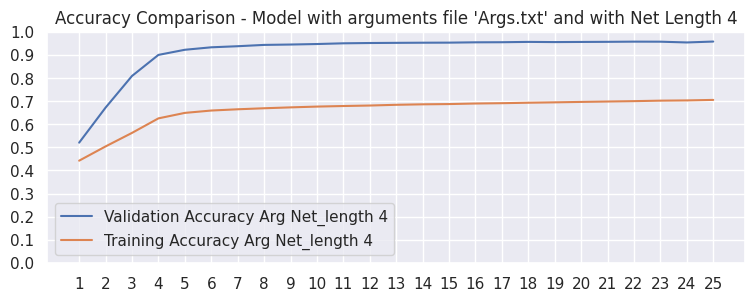

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(model_1['valAcc'],label="Validation Accuracy Arg Net_length 4")
plt.plot(model_1['trainAcc'],label="Training Accuracy Arg Net_length 4")
plt.title(label="Accuracy Comparison - Model with arguments file 'Args.txt' and with Net Length 4")
plt.xticks(model_1.index)
plt.yticks(np.arange(0,1.1,.1))
plt.legend()
plt.show()

## Best accuracy of the model 1 is 95.78%**


In [ ]:
# The model had converged around the 10th Epoch and there's no significant improvement after that

# Environmental Sustainability Adherence

In [ ]:
# Evidence for sustainablity section in the report
# Given the system ample time to cool down between each epoch

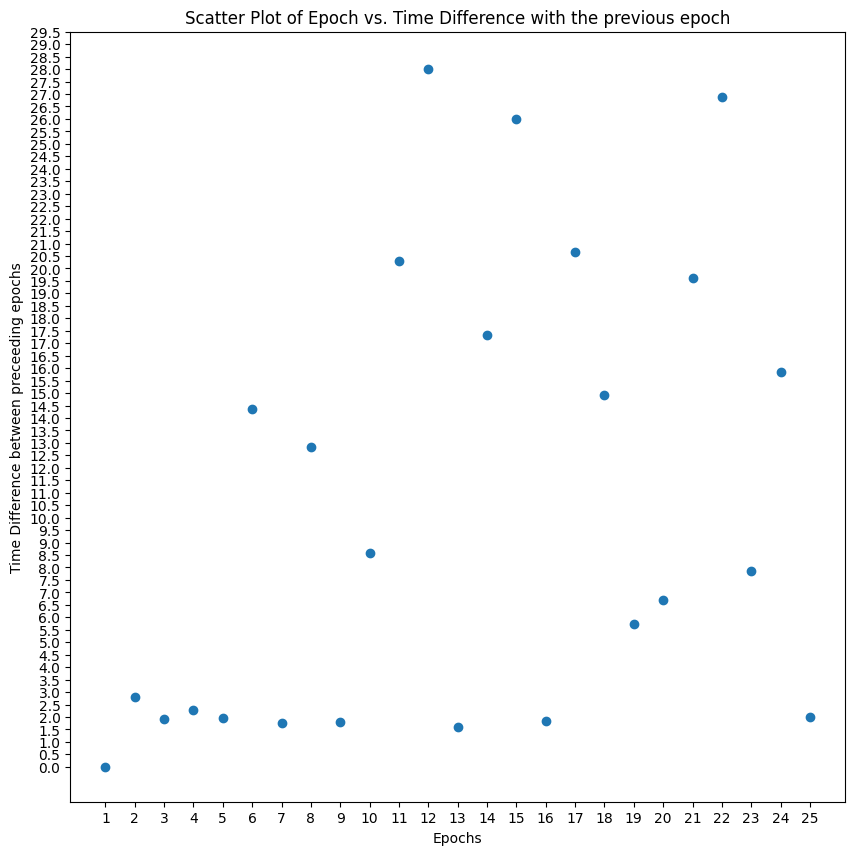

In [ ]:
directory_path = './weights/clevrExperiment/'
file_info = {}
file_list = os.listdir(directory_path)

for filename in file_list:
  if("data" in filename):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        creation_time = os.path.getctime(file_path)
        readable_time = datetime.fromtimestamp(creation_time).strftime('%Y-%m-%d %H:%M:%S')
        file_info[int(filename.split('weights')[-1].split('.')[0])]=[readable_time]
        #print(f"File: {filename}, Creation Time: {readable_time}")
df = pd.DataFrame(file_info).transpose()
df.columns = ['Timestamp']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Time_Difference'] = (df['Timestamp'].shift(-1) - df['Timestamp']).fillna(pd.Timedelta(seconds=0))
df['Time_Difference'] = df['Time_Difference'] / pd.Timedelta(hours=1)
df['Time_Difference'] = df['Time_Difference'].shift(1)
df.fillna(0,inplace=True)
plt.figure(figsize=(10,10))
plt.scatter(df.index, df['Time_Difference'])
plt.xlabel('Epochs')
plt.ylabel('Time Difference between preceeding epochs')
plt.title('Scatter Plot of Epoch vs. Time Difference with the previous epoch')
plt.xticks(df.index)
plt.yticks(np.arange(0,30,.5))
plt.show()

**Started the approach of training with multiple files one after the other to reduce the over usage of a single system as well as reduce the overall time required for training the models (Sustainability Considerations - Heat reduction and Energy Conservation)**

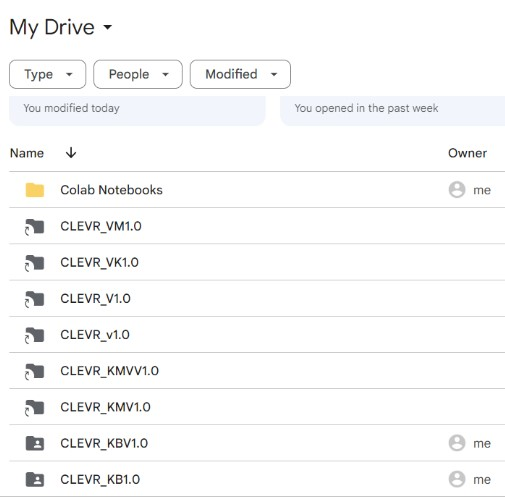

# Model Variation 2,3,4
##### Experiment Names = clevrExperimentWithArg4, clevrExperimentWithArg8, clevrExperimentWithArg16
##### Net Length = 4, 8, 16
##### Number of Epochs = 13
##### Argument file = args4.txt

## Training model 2,3,4

In [ ]:
#file_list = {1:"CLEVR_KB1.0",2:"CLEVR_KBV1.0",3:"CLEVR_KMVV1.0",4:"CLEVR_KMV1.0",5:"CLEVR_KB1.0",6:"CLEVR_KBV1.0",7:"CLEVR_KMVV1.0",8:"CLEVR_KMV1.0",9:"CLEVR_KB1.0",10:"CLEVR_KBV1.0",11:"CLEVR_KMVV1.0",12:"CLEVR_KMV1.0",13:"CLEVR_KB1.0"}
file_list = {1:"CLEVR_KB1.0",2:"CLEVR_KBV1.0",3:"CLEVR_KMVV1.0",4:"CLEVR_KMV1.0",5:"CLEVR_KB1.0",6:"CLEVR_KBV1.0",7:"CLEVR_KMVV1.0",8:"CLEVR_KMV1.0",9:"CLEVR_KB1.0",10:"CLEVR_KBV1.0",11:"CLEVR_KMVV1.0",12:"CLEVR_KMV1.0",13:"CLEVR_KB1.0"}
# The variable "file_list" is a dictionary with key value pairs of epoch number and the corresponding with in which that epoch has to be trained

#Looping through the dictionary
for j,i in file_list.items():
  # Mounting the drive in the beginning of each epoch to avoid timeout of the google drive connection with the google colab
  drive.mount('/content/drive')
  # Declaring the path dynamically for each epoch
  path = f"/content/drive/MyDrive/{i}"
  # Moving to that path
  %cd $path
  if(j==1):
    #argument_string = """--expName "clevrExperimentWithArg4" --train --trainedNum {} --testedNum {} --epochs {} --netLength 4 @configs/args4.txt""".format(int(700000 * 1),int(10000 * 1),j)
    argument_string = """--expName "clevrExperimentWithArg8" --train --trainedNum {} --testedNum {} --epochs {} --netLength 8 @configs/args4.txt""".format(int(700000 * 1),int(10000 * 1),j)
    #argument_string = """--expName "clevrExperimentWithArg16" --train --trainedNum {} --testedNum {} --epochs {} --netLength 16 @configs/args4.txt""".format(int(700000 * 1),int(10000 * 1),j)
  else:
    #argument_string = """--expName "clevrExperimentWithArg4" --train -r --restoreEpoch {} --trainedNum {} --testedNum {} --epochs {} --netLength 4 @configs/args4.txt""".format(j-1,int(700000 * 1),int(10000 * 1),j)
    argument_string = """--expName "clevrExperimentWithArg8" --train -r --restoreEpoch {} --trainedNum {} --testedNum {} --epochs {} --netLength 8 @configs/args4.txt""".format(j-1,int(700000 * 1),int(10000 * 1),j)
    #argument_string = """--expName "clevrExperimentWithArg16" --train -r --restoreEpoch {} --trainedNum {} --testedNum {} --epochs {} --netLength 16 @configs/args4.txt""".format(j-1,int(700000 * 1),int(10000 * 1),j)

  print(argument_string)
  %run main.py $argument_string
  tf.compat.v1.reset_default_graph()
  time.sleep(30)
  #runtime.unassign()

*j --> Epoch Number*

*i --> File Name*

*int(700000 * 1) --> Taking the 100% of Train data to train the model (Total number of images in train data is 700000)*

*int(10000 * 1) --> Testing the results by predicting 10000 images from the test dataset*

**tf.compat.v1.reset_default_graph()** --> This step is used only since the code is created using Tensorflow 1. In TensorFlow 2.0, eager execution is enabled by default, which simplifies graph management and eliminates the need to explicitly reset the graph. But in this code, since we are training the epochs rapidly we'll have to reset the graph between each epochs.

### Code for creating predictions and attention maps

In [ ]:
%run main.py --expName "clevrExperimentWithArg8" --finalTest --testedNum 30 -r --netLength 8 --getPreds --getAtt @configs/args4.txt

Instructions for updating:
non-resource variables are not supported in the long term


Preprocess data...
Loading data...
took 84.71 seconds
Loading word vectors...
0
{'<PAD>': 0, '<UNK>': 1, '<START>': 2, '<END>': 3, 'are': 4, 'there': 5, 'more': 6, 'big': 7, 'green': 8, 'things': 9, 'than': 10, 'large': 11, 'purple': 12, 'shiny': 13, 'cubes': 14, 'how': 15, 'many': 16, 'other': 17, 'of': 18, 'the': 19, 'same': 20, 'shape': 21, 'as': 22, 'tiny': 23, 'cyan': 24, 'matte': 25, 'object': 26, 'is': 27, 'color': 28, 'sphere': 29, 'cube': 30, 'what': 31, 'material': 32, 'that': 33, 'right': 34, 'brown': 35, 'cylinder': 36, 'and': 37, 'left': 38, 'gray': 39, 'on': 40, 'side': 41, 'small': 42, 'rubber': 43, 'behind': 44, 'thing': 45, 'to': 46, 'metallic': 47, 'size': 48, 'any': 49, 'have': 50, 'block': 51, 'blue': 52, 'yellow': 53, 'a': 54, ';': 55, 'it': 56, 'ball': 57, 'its': 58, 'in': 59, 'front': 60, 'does': 61, 'number': 62, 'red': 63, 'spheres': 64, 'made': 65, 'metal': 66, 'cylinders': 67, 'both': 68, 'balls': 69, 'or': 70, 'blocks': 71, 'objects': 72, 'visible': 73, 'ano

/content/drive/MyDrive/CLEVR_V1.0/ops.py:771: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = cells[cellType](hDim, reuse=tf.AUTO_REUSE, activation = activation)


took 6.86 seconds
Restoring epoch 13 and lr 0.0001
Restoring weights
Testing on epoch 13...



took 61.86 seconds
Training EMA Loss: 0.5743883006127362, Training EMA accuracy: 0.7
Validation Loss: 0.3975556042010737, Validation accuracy: 0.9333333333333333
Writing predictions...
Done!


## Finding out a predicted value and plotting attention maps

/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0/visualization.py:92: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=cmap,override_builtin=True)
/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0/visualization.py:92: UserWarning: Overwriting the cmap 'custom' that was already in the registry.
  plt.register_cmap(cmap=cmap,override_builtin=True)
/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0/visualization.py:147: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(inImgName(instance["imageId"]))


1
id:980
img:98
Q:Is there anything else that has the same color as the small shiny sphere?
G:yes
P:yes
RIGHT


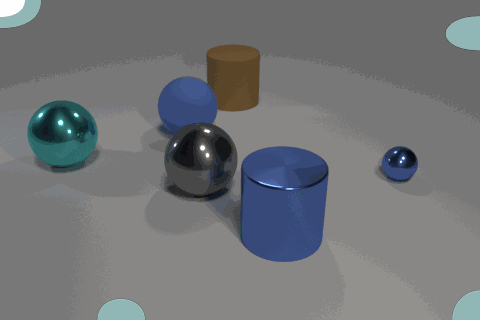

________________________________________________________________________


<ipython-input-44-5a48aae2344d>:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  matrix = imread(matrix_path)


<Figure size 640x480 with 0 Axes>

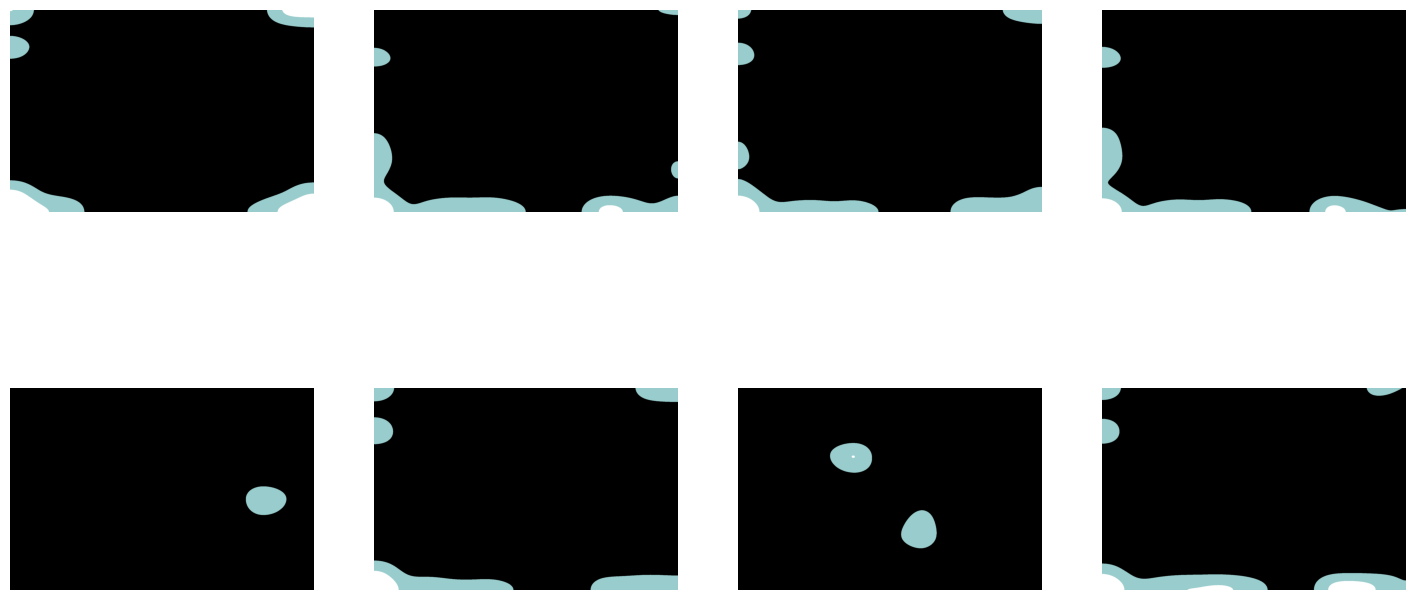

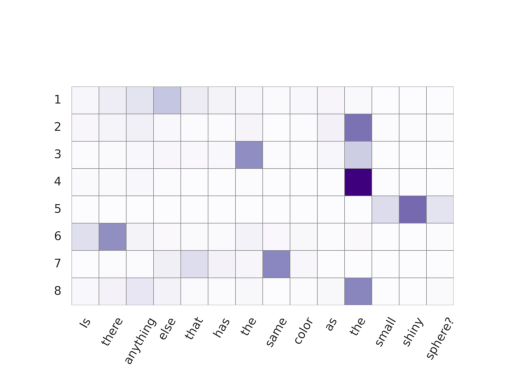

<Figure size 640x480 with 0 Axes>

In [ ]:
%run visualization.py --expName "clevrExperimentWithArg8" --tier val --instances 1
plt.clf()
image_split('clevrExperimentWithArg8','980',2,4)
plt.tight_layout()
plt.show()

**In this example, Since we've declared the net length parameter as 8, we have 8 attention maps. i.e 8 iterations in the MAC cell**

**The question in this example is not straight forward. It involes other shapes or features from other objects in the image.**

*Is there anything else that has the same color as the small shiny sphere?*

**This is a rather complex question that makes the MAC network to first find out the small shiny sphere and then find if anything else has the same color**

## Plotting the metrics for each epoch

In [ ]:
model_2 = pd.read_csv('./results/clevrExperimentWithArg4/results-clevrExperimentWithArg4.csv',skiprows=1,index_col=0)
model_3 = pd.read_csv('./results/clevrExperimentWithArg8/results-clevrExperimentWithArg8.csv',skiprows=3,index_col=0)
model_4 = pd.read_csv('./results/clevrExperimentWithArg16/results-clevrExperimentWithArg16.csv',skiprows=8,index_col=0)

In [ ]:
model_2 = model_2[~model_2.index.duplicated(keep='first')]
model_3 = model_3[~model_3.index.duplicated(keep='first')]
model_4 = model_4[~model_4.index.duplicated(keep='first')]

In [ ]:
model_2

,trainAcc,valAcc,trainLoss,valLoss,evalTrainAcc,evalTrainLoss,time,lr
epoch,,,,,,,,
1,0.442896,0.5173,1.030830,0.906260,0.4821,0.946490,7447.641777,0.0001
2,0.506101,0.6696,0.927842,0.643693,0.5537,0.819774,6736.828886,0.0001
3,0.556094,0.7322,0.839478,0.528534,0.5869,0.762291,7413.141894,0.0001
4,0.613867,0.9041,0.743221,0.248881,0.6648,0.639361,6843.338999,0.0001
5,0.650407,0.9260,0.673647,0.190086,0.6756,0.620192,7374.461921,0.0001
6,0.661336,0.9397,0.648240,0.160076,0.6824,0.599809,6652.787029,0.0001
7,0.668639,0.9475,0.631653,0.139541,0.6859,0.586366,6761.449927,0.0001
8,0.674881,0.9514,0.620098,0.127638,0.6922,0.575999,6634.621751,0.0001
9,0.678399,0.9584,0.610996,0.114212,0.6945,0.570453,7572.169515,0.0001


In [ ]:
model_3

,trainAcc,valAcc,trainLoss,valLoss,evalTrainAcc,evalTrainLoss,time,lr
epoch,,,,,,,,
1,0.443807,0.5208,1.031155,0.914221,0.4859,0.946526,8188.527396,0.0001
2,0.498766,0.6628,0.937296,0.655812,0.5604,0.826777,8174.367156,0.0001
3,0.562852,0.8238,0.831230,0.414765,0.6291,0.713212,7711.599872,0.0001
4,0.634104,0.9144,0.708873,0.218178,0.6666,0.623095,8043.860254,0.0001
5,0.653569,0.9320,0.665332,0.174775,0.6753,0.606059,8126.647273,0.0001
6,0.664802,0.9419,0.641841,0.150060,0.6862,0.587643,6959.995075,0.0001
7,0.670753,0.9504,0.626859,0.132903,0.6887,0.576297,6609.068100,0.0001
8,0.676131,0.9532,0.615899,0.122455,0.6908,0.570374,10086.497983,0.0001
9,0.679709,0.9563,0.607336,0.111402,0.6929,0.568277,6689.821342,0.0001


In [ ]:
model_4

,trainAcc,valAcc,trainLoss,valLoss,evalTrainAcc,evalTrainLoss,time,lr
epoch,,,,,,,,
1,0.436164,0.4695,1.048222,0.968487,0.4599,0.968201,7758.621546,0.0001
2,0.463850,0.5284,0.986567,0.900498,0.4955,0.939288,7908.121138,0.0001
3,0.513845,0.6845,0.914691,0.625936,0.5648,0.810062,7849.786728,0.0001
4,0.564789,0.7702,0.824965,0.490521,0.6049,0.747145,8132.169590,0.0001
5,0.610442,0.8948,0.749382,0.262142,0.6589,0.641296,7905.711147,0.0001
6,0.651222,0.9315,0.669485,0.180221,0.6762,0.601719,7994.886657,0.0001
7,0.664648,0.9428,0.640662,0.144696,0.6883,0.580575,7709.464406,0.0001
8,0.672011,0.9521,0.623851,0.124198,0.6908,0.570535,8328.601821,0.0001
9,0.677258,0.9567,0.612334,0.116957,0.6941,0.565986,7859.568483,0.0001


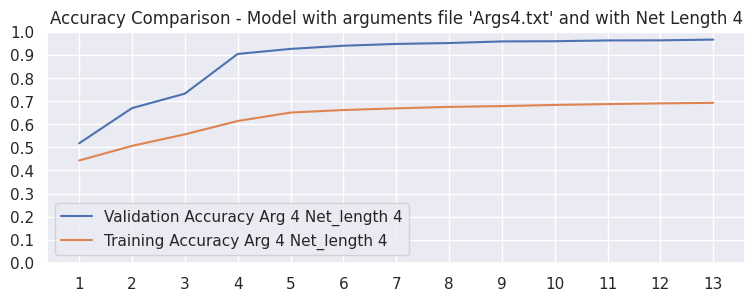

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(model_2['valAcc'],label="Validation Accuracy Arg 4 Net_length 4")
plt.plot(model_2['trainAcc'],label="Training Accuracy Arg 4 Net_length 4")
plt.title(label="Accuracy Comparison - Model with arguments file 'Args4.txt' and with Net Length 4")
plt.xticks(model_2.index)
plt.yticks(np.arange(0,1.1,.1))
plt.legend()
plt.show()

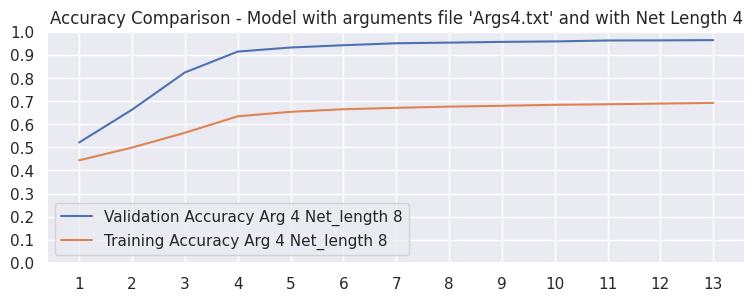

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(model_3['valAcc'],label="Validation Accuracy Arg 4 Net_length 8")
plt.plot(model_3['trainAcc'],label="Training Accuracy Arg 4 Net_length 8")
plt.title(label="Accuracy Comparison - Model with arguments file 'Args4.txt' and with Net Length 4")
plt.xticks(model_3.index)
plt.yticks(np.arange(0,1.1,.1))
plt.legend()
plt.show()

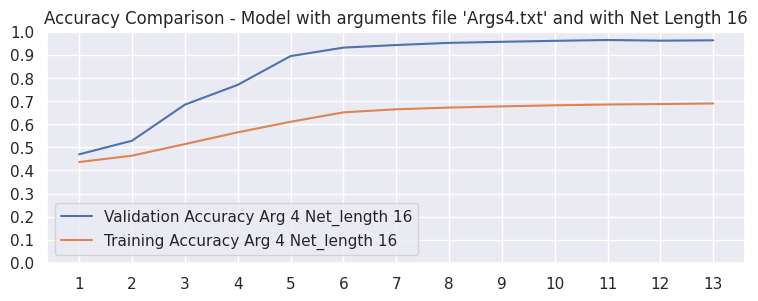

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(model_4['valAcc'],label="Validation Accuracy Arg 4 Net_length 16")
plt.plot(model_4['trainAcc'],label="Training Accuracy Arg 4 Net_length 16")
plt.title(label="Accuracy Comparison - Model with arguments file 'Args4.txt' and with Net Length 16")
plt.xticks(model_4.index)
plt.yticks(np.arange(0,1.1,.1))
plt.legend()
plt.show()

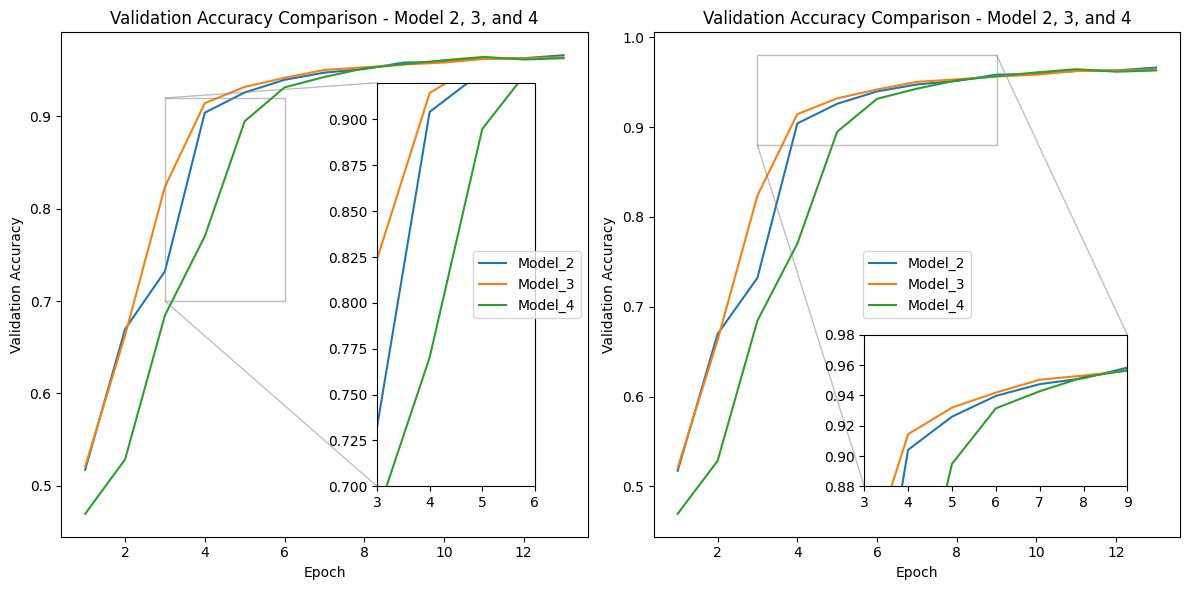

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First plot on the left
ax1.plot(model_2.index, model_2['valAcc'], label='Model_2')
ax1.plot(model_3.index, model_3['valAcc'], label='Model_3')
ax1.plot(model_4.index, model_4['valAcc'], label='Model_4')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation Accuracy')
ax1.set_title('Validation Accuracy Comparison - Model 2, 3, and 4')
ax1.legend()
ax1in = ax1.inset_axes([0.6, 0.1, 0.3, 0.8])
ax1in.plot(model_2.index, model_2['valAcc'])
ax1in.plot(model_3.index, model_3['valAcc'])
ax1in.plot(model_4.index, model_4['valAcc'])
ax1in.set_xlim(3, 6)
ax1in.set_ylim(0.7, 0.92)
ax1.indicate_inset_zoom(ax1in)

# Second plot on the right
ax2.plot(model_2.index, model_2['valAcc'], label='Model_2')
ax2.plot(model_3.index, model_3['valAcc'], label='Model_3')
ax2.plot(model_4.index, model_4['valAcc'], label='Model_4')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Accuracy')
ax2.set_title('Validation Accuracy Comparison - Model 2, 3, and 4')
ax2.legend()
ax2in = ax2.inset_axes([0.4, 0.1, 0.5, 0.3])
ax2in.plot(model_2.index, model_2['valAcc'])
ax2in.plot(model_3.index, model_3['valAcc'])
ax2in.plot(model_4.index, model_4['valAcc'])
ax2in.set_xlim(3, 9)
ax2in.set_ylim(0.88, 0.98)
ax2.indicate_inset_zoom(ax2in)

plt.tight_layout()
plt.show()

## Best accuracy among model 2,3 and 4 is in model 2 with 96.63%

# Model Variation 5,6,7
##### Experiment Names = clevrExperimentWithArg23_Len4, clevrExperimentWithArg23_Len8, clevrExperimentWithArg23_Len16
##### Net Length = 4, 8, 16
##### Number of Epochs = 13
##### Argument file = args23.txt

## Training Model 5,6,7

In [ ]:
#file_list = {1:"CLEVR_v1.0",2:"CLEVR_VK1.0",3:"CLEVR_V1.0",4:"CLEVR_v1.0",5:"CLEVR_VK1.0",6:"CLEVR_V1.0",7:"CLEVR_v1.0",8:"CLEVR_VK1.0",9:"CLEVR_V1.0",10:"CLEVR_v1.0",11:"CLEVR_VK1.0",12:"CLEVR_V1.0",13:"CLEVR_v1.0"}
file_list = {1:"CLEVR_v1.0",2:"CLEVR_VK1.0",3:"CLEVR_V1.0",4:"CLEVR_v1.0",5:"CLEVR_VK1.0",6:"CLEVR_V1.0",7:"CLEVR_v1.0",8:"CLEVR_VK1.0",9:"CLEVR_V1.0",10:"CLEVR_v1.0",11:"CLEVR_VK1.0",12:"CLEVR_V1.0",13:"CLEVR_v1.0"}
for j,i in file_list.items():
  drive.mount('/content/drive')
  path = f"/content/drive/MyDrive/{i}"
  %cd $path
  if(j==1):
    #argument_string = """--expName "clevrExperimentWithArg23_Len4" --train --testedNum 10000 --epochs {} --netLength 4 @configs/args23.txt""".format(j)
    #argument_string = """--expName "clevrExperimentWithArg23_Len8" --train --testedNum 10000 --epochs {} --netLength 8 @configs/args23.txt""".format(j)
    argument_string = """--expName "clevrExperimentWithArg23_Len16" --train --testedNum 10000 --epochs {} --netLength 16 @configs/args23.txt""".format(j)
  else:
    #argument_string = """--expName "clevrExperimentWithArg23_Len4" --train -r --restoreEpoch {} --testedNum 10000 --epochs {} --netLength 4 @configs/args23.txt""".format(j-1,j)
    #argument_string = """--expName "clevrExperimentWithArg23_Len8" --train -r --restoreEpoch {} --testedNum 10000 --epochs {} --netLength 8 @configs/args23.txt""".format(j-1,j)
    argument_string = """--expName "clevrExperimentWithArg23_Len16" --train -r --restoreEpoch {} --testedNum 10000 --epochs {} --netLength 16 @configs/args23.txt""".format(j-1,j)
  print(argument_string)
  %run main.py $argument_string
  tf.compat.v1.reset_default_graph()
  time.sleep(30)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CLEVR_v1.0
--expName "clevrExperimentWithArg23_Len16" --train -r --restoreEpoch 12 --testedNum 10000 --epochs 13 --netLength 16 @configs/args23.txt


Instructions for updating:
non-resource variables are not supported in the long term


Preprocess data...
Loading data...
took 84.52 seconds
Loading word vectors...
0
{'<PAD>': 0, '<UNK>': 1, '<START>': 2, '<END>': 3, 'are': 4, 'there': 5, 'more': 6, 'big': 7, 'green': 8, 'things': 9, 'than': 10, 'large': 11, 'purple': 12, 'shiny': 13, 'cubes': 14, 'how': 15, 'many': 16, 'other': 17, 'of': 18, 'the': 19, 'same': 20, 'shape': 21, 'as': 22, 'tiny': 23, 'cyan': 24, 'matte': 25, 'object': 26, 'is': 27, 'color': 28, 'sphere': 29, 'cube': 30, 'what': 31, 'material': 32, 'that': 33, 'right': 34, 'brown': 35, 'cylinder': 36, 'and': 37, 'left': 38, 'gray': 39, 'on': 40, 'side': 41, 'small': 42, 'rubber': 43, 'behind': 44, 'thing': 45, 'to': 46, 'metallic': 47, 'size': 48, 'any': 49, 'have': 50, 'block': 51, 'blue': 52, 'yellow': 53, 'a': 54, ';': 55, 'it': 56, 'ball': 57, 'its': 58, 'in': 59, 'front': 60, 'does': 61, 'number': 62, 'red': 63, 'spheres': 64, 'made': 65, 'metal': 66, 'cylinders': 67, 'both': 68, 'balls': 69, 'or': 70, 'blocks': 71, 'objects': 72, 'visible': 73, 'ano

/content/drive/MyDrive/CLEVR_v1.0/ops.py:771: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = cells[cellType](hDim, reuse=tf.AUTO_REUSE, activation = activation)


took 13.95 seconds
Restoring epoch 12 and lr 0.0001
Restoring weights
Training epoch 13...
eb 13,3000 (192021 / 699989), t = 0.69 (0.00+0.68), lr 0.0001, l = 0.4362, a = 0.7031, avL = 0.6052, avA = 0.6846, g = 2.1345, emL = 0.6096, emA = 0.6797; clevrExperimentWithArg23_Len16
saving weights
eb 13,6000 (384021 / 699989), t = 0.71 (0.00+0.69), lr 0.0001, l = 0.5333, a = 0.7188, avL = 0.6062, avA = 0.6836, g = 1.6242, emL = 0.6192, emA = 0.6662; clevrExperimentWithArg23_Len16
saving weights
eb 13,9000 (576021 / 699989), t = 0.70 (0.00+0.68), lr 0.0001, l = 0.5743, a = 0.6562, avL = 0.6062, avA = 0.6833, g = 4.5168, emL = 0.6063, emA = 0.6781; clevrExperimentWithArg23_Len16
saving weights

Restoring EMA weights


Restoring standard weights

took 8320.41 seconds
Training Loss: 0.6065475238041983, Training accuracy: 0.6830850199074557
Training EMA Loss: 0.5704142472166924, Training EMA accuracy: 0.7013
Validation Loss: 0.12480240834841302, Validation accuracy: 0.9561
Training took 8321.36 se

### Code for creating predictions and attention maps


In [ ]:
%run main.py --expName "clevrExperimentWithArg23_Len16" --finalTest --testedNum 30 -r --netLength 16 --getPreds --getAtt @configs/args23.txt

Instructions for updating:
non-resource variables are not supported in the long term


Preprocess data...
Loading data...
took 82.05 seconds
Loading word vectors...
0
{'<PAD>': 0, '<UNK>': 1, '<START>': 2, '<END>': 3, 'are': 4, 'there': 5, 'more': 6, 'big': 7, 'green': 8, 'things': 9, 'than': 10, 'large': 11, 'purple': 12, 'shiny': 13, 'cubes': 14, 'how': 15, 'many': 16, 'other': 17, 'of': 18, 'the': 19, 'same': 20, 'shape': 21, 'as': 22, 'tiny': 23, 'cyan': 24, 'matte': 25, 'object': 26, 'is': 27, 'color': 28, 'sphere': 29, 'cube': 30, 'what': 31, 'material': 32, 'that': 33, 'right': 34, 'brown': 35, 'cylinder': 36, 'and': 37, 'left': 38, 'gray': 39, 'on': 40, 'side': 41, 'small': 42, 'rubber': 43, 'behind': 44, 'thing': 45, 'to': 46, 'metallic': 47, 'size': 48, 'any': 49, 'have': 50, 'block': 51, 'blue': 52, 'yellow': 53, 'a': 54, ';': 55, 'it': 56, 'ball': 57, 'its': 58, 'in': 59, 'front': 60, 'does': 61, 'number': 62, 'red': 63, 'spheres': 64, 'made': 65, 'metal': 66, 'cylinders': 67, 'both': 68, 'balls': 69, 'or': 70, 'blocks': 71, 'objects': 72, 'visible': 73, 'ano

/content/drive/MyDrive/CLEVR_VK1.0/ops.py:771: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = cells[cellType](hDim, reuse=tf.AUTO_REUSE, activation = activation)


took 13.91 seconds
Restoring epoch 13 and lr 0.0001
Restoring weights
Testing on epoch 13...



took 79.48 seconds
Training EMA Loss: 0.8791635036468506, Training EMA accuracy: 0.5666666666666667
Validation Loss: 0.13407331705093384, Validation accuracy: 0.9333333333333333
Writing predictions...
Done!


## Finding out a predicted value and plotting attention maps


/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0/visualization.py:92: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=cmap,override_builtin=True)
/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0/visualization.py:92: UserWarning: Overwriting the cmap 'custom' that was already in the registry.
  plt.register_cmap(cmap=cmap,override_builtin=True)
/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0/visualization.py:147: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(inImgName(instance["imageId"]))


46
id:63886
img:6389
Q:Are the big purple block and the big block that is on the left side of the small brown object made of the same material?
G:no
P:no
RIGHT


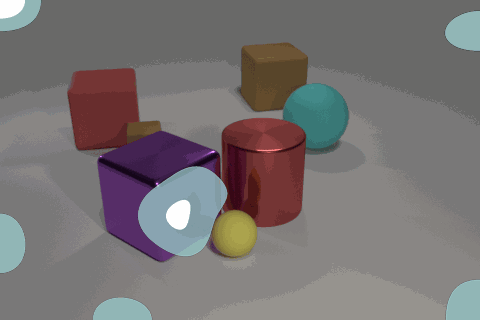

________________________________________________________________________


<ipython-input-22-5a48aae2344d>:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  matrix = imread(matrix_path)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

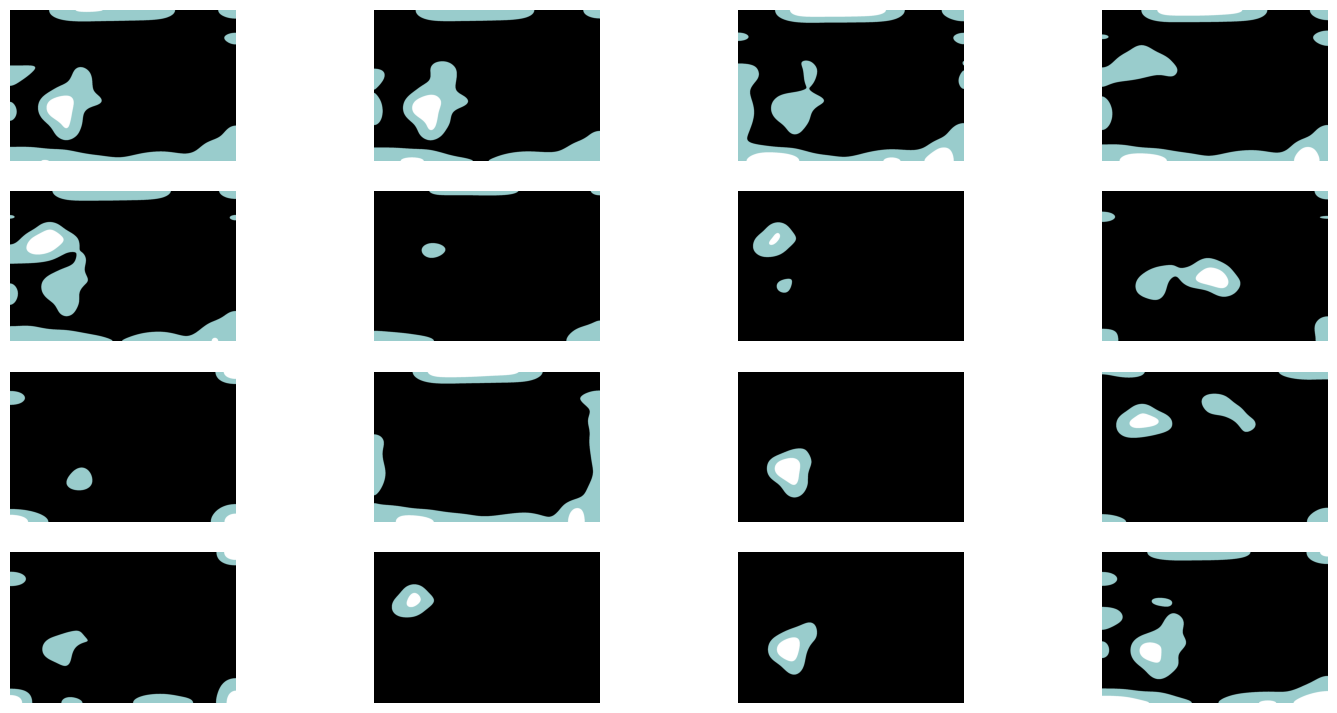

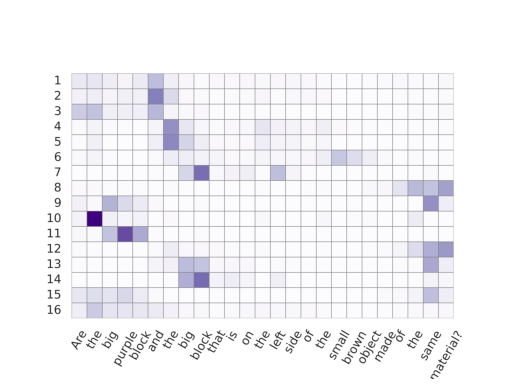

<Figure size 640x480 with 0 Axes>

In [ ]:
%run visualization.py --expName "clevrExperimentWithArg23_Len16" --tier val --instances 46
plt.clf()
image_split('clevrExperimentWithArg23_Len16','63886',4,4)
# Display the subplots
plt.tight_layout()
plt.show()

**In this example, Since we've declared the net length parameter as 16, we have 16 attention maps. i.e 16 iterations in the MAC cell**

**The question in this example is not straight forward. It involes other shapes or features from other objects in the image.**

*Are the big purple block and the big block that is on the left side of the small brown object made of the same material?*

**This is a complex question and for the mac cell to detect the answer for this, it has to find out where the small brown object is first and then from there it has to find out what's on the left side of it that is a big block then find the material of that block and finally compare it with the material of the purple cube**

## Plotting the metrics for each epoch

In [ ]:
model_5 = pd.read_csv('./results/clevrExperimentWithArg23_Len4/results-clevrExperimentWithArg23_Len4.csv',skiprows=1,index_col=0)
model_6 = pd.read_csv('./results/clevrExperimentWithArg23_Len8/results-clevrExperimentWithArg23_Len8.csv',skiprows=1,index_col=0)
model_7 = pd.read_csv('./results/clevrExperimentWithArg23_Len16/results-clevrExperimentWithArg23_Len16.csv',skiprows=1,index_col=0)

In [ ]:
model_5

,trainAcc,valAcc,trainLoss,valLoss,evalTrainAcc,evalTrainLoss,time,lr
epoch,,,,,,,,
1,0.438451,0.5184,1.038203,0.916878,0.4813,0.960528,6672.510772,0.0001
2,0.496641,0.6426,0.942580,0.705885,0.5508,0.851929,6767.886196,0.0001
3,0.547654,0.7350,0.855488,0.537757,0.5924,0.774870,6915.032825,0.0001
4,0.617783,0.8984,0.742409,0.260898,0.6587,0.652227,7174.757971,0.0001
5,0.647009,0.9235,0.680705,0.201276,0.6715,0.621500,6975.651425,0.0001
6,0.656520,0.9349,0.656319,0.170818,0.6754,0.609154,7074.257783,0.0001
7,0.663240,0.9412,0.642526,0.156890,0.6802,0.600431,7167.310688,0.0001
8,0.667953,0.9435,0.632520,0.146879,0.6899,0.590593,7333.959569,0.0001
9,0.671403,0.9474,0.624217,0.133482,0.6896,0.582011,7094.980931,0.0001


In [ ]:
model_6

,trainAcc,valAcc,trainLoss,valLoss,evalTrainAcc,evalTrainLoss,time,lr
epoch,,,,,,,,
1,0.443280,0.5216,1.030112,0.913240,0.4863,0.955650,7195.691102,0.0001
2,0.500601,0.6554,0.934621,0.684379,0.5497,0.845035,7225.148677,0.0001
3,0.553610,0.7299,0.844015,0.541670,0.5861,0.773350,7260.663977,0.0001
4,0.604448,0.8871,0.759141,0.283383,0.6552,0.659064,7826.198936,0.0001
5,0.646100,0.9234,0.682418,0.197371,0.6754,0.621414,6729.744941,0.0001
6,0.658386,0.9377,0.654278,0.170210,0.6800,0.607531,6894.419378,0.0001
7,0.666468,0.9416,0.638101,0.149031,0.6838,0.594568,6649.121096,0.0001
8,0.670841,0.9495,0.626768,0.139001,0.6884,0.584411,7117.575286,0.0001
9,0.675196,0.9530,0.617766,0.125394,0.6929,0.579227,7511.897930,0.0001


In [ ]:
model_7

,trainAcc,valAcc,trainLoss,valLoss,evalTrainAcc,evalTrainLoss,time,lr
epoch,,,,,,,,
1,0.435388,0.4783,1.033951,0.966046,0.4695,0.978441,8592.487143,0.0001
2,0.471649,0.5387,0.976088,0.893615,0.5020,0.937094,8125.430301,0.0001
3,0.520854,0.6776,0.902038,0.632002,0.5705,0.816366,8254.910832,0.0001
4,0.476155,0.6681,0.965142,0.672455,0.4898,0.947615,8014.129143,0.0001
5,0.572422,0.8116,0.812659,0.431011,0.6300,0.721319,8282.563974,0.0001
6,0.485243,0.7975,0.951772,0.478246,0.5012,0.932189,8682.218271,0.0001
7,0.642454,0.9176,0.695199,0.211009,0.6739,0.623284,9378.844030,0.0001
8,0.663143,0.9373,0.649587,0.165132,0.6869,0.598810,8765.603289,0.0001
9,0.492928,0.8995,0.938461,0.258451,0.5072,0.918548,8434.764884,0.0001


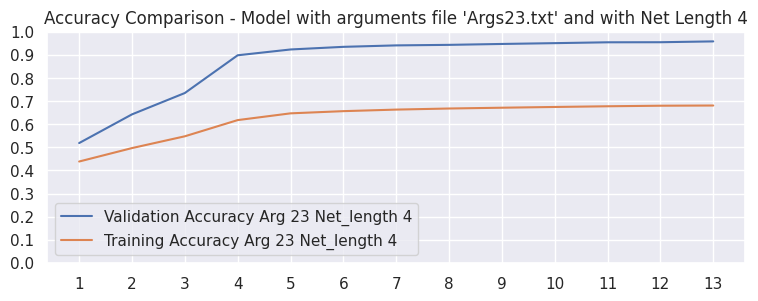

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(model_5['valAcc'],label="Validation Accuracy Arg 23 Net_length 4")
plt.plot(model_5['trainAcc'],label="Training Accuracy Arg 23 Net_length 4")
plt.title(label="Accuracy Comparison - Model with arguments file 'Args23.txt' and with Net Length 4")
plt.xticks(model_5.index)
plt.yticks(np.arange(0,1.1,.1))
plt.legend()
plt.show()

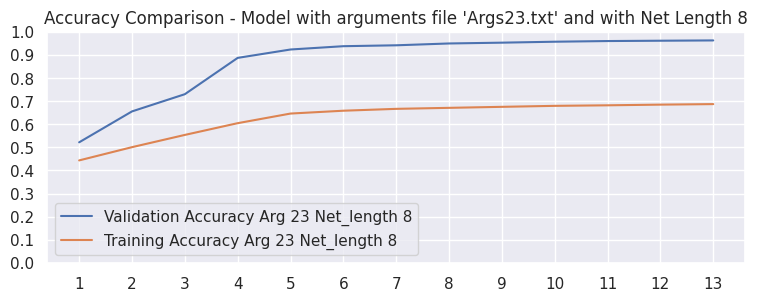

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(model_6['valAcc'],label="Validation Accuracy Arg 23 Net_length 8")
plt.plot(model_6['trainAcc'],label="Training Accuracy Arg 23 Net_length 8")
plt.title(label="Accuracy Comparison - Model with arguments file 'Args23.txt' and with Net Length 8")
plt.xticks(model_6.index)
plt.yticks(np.arange(0,1.1,.1))
plt.legend()
plt.show()

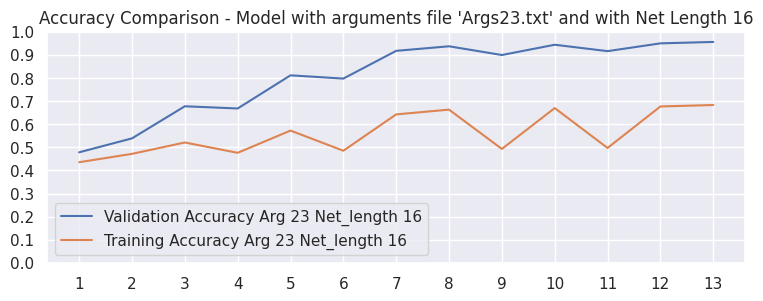

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(model_7['valAcc'],label="Validation Accuracy Arg 23 Net_length 16")
plt.plot(model_7['trainAcc'],label="Training Accuracy Arg 23 Net_length 16")
plt.title(label="Accuracy Comparison - Model with arguments file 'Args23.txt' and with Net Length 16")
plt.xticks(model_7.index)
plt.yticks(np.arange(0,1.1,.1))
plt.legend()
plt.show()

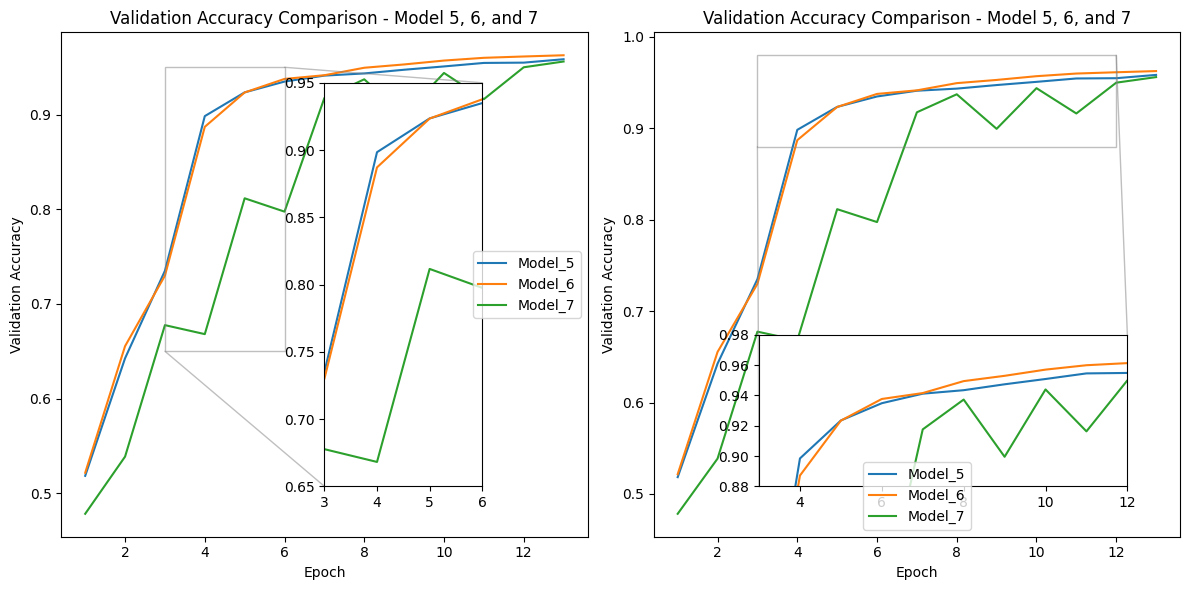

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First plot on the left
ax1.plot(model_5.index, model_5['valAcc'], label='Model_5')
ax1.plot(model_6.index, model_6['valAcc'], label='Model_6')
ax1.plot(model_7.index, model_7['valAcc'], label='Model_7')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation Accuracy')
ax1.set_title('Validation Accuracy Comparison - Model 5, 6, and 7')
ax1.legend()
ax1in = ax1.inset_axes([0.5, 0.1, 0.3, 0.8])
ax1in.plot(model_5.index, model_5['valAcc'])
ax1in.plot(model_6.index, model_6['valAcc'])
ax1in.plot(model_7.index, model_7['valAcc'])
ax1in.set_xlim(3, 6)
ax1in.set_ylim(0.65, 0.95)
ax1.indicate_inset_zoom(ax1in)

# Second plot on the right
ax2.plot(model_5.index, model_5['valAcc'], label='Model_5')
ax2.plot(model_6.index, model_6['valAcc'], label='Model_6')
ax2.plot(model_7.index, model_7['valAcc'], label='Model_7')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Accuracy')
ax2.set_title('Validation Accuracy Comparison - Model 5, 6, and 7')
ax2.legend()
ax2in = ax2.inset_axes([0.2, 0.1, 0.7, 0.3])
ax2in.plot(model_5.index, model_5['valAcc'])
ax2in.plot(model_6.index, model_6['valAcc'])
ax2in.plot(model_7.index, model_7['valAcc'])
ax2in.set_xlim(3, 12)
ax2in.set_ylim(0.88, 0.98)
ax2.indicate_inset_zoom(ax2in)

plt.tight_layout()
plt.show()

## Best accuracy among model 5,6 and 7 is in model 6 with 96.27%

# Model Variation 8,9,10
##### Experiment Names = clevrExperimentWithArg1_Len4_size20Percent, clevrExperimentWithArg1_Len4_size40Percent, clevrExperimentWithArg1_Len4_size60Percent
##### Net Length = 4
##### Number of Epochs = 13
##### Argument file = args1.txt
##### Training data size = 20%, 40%, 60%

## Training Model 8,9,10


In [ ]:
file_list = {1:"CLEVR_VK1.0",2:"CLEVR_VK1.0",3:"CLEVR_VK1.0",4:"CLEVR_VK1.0",5:"CLEVR_VM1.0",6:"CLEVR_VM1.0",7:"CLEVR_VM1.0",8:"CLEVR_VM1.0",9:"CLEVR_v1.0",10:"CLEVR_v1.0",11:"CLEVR_v1.0",12:"CLEVR_v1.0",13:"CLEVR_VK1.0"}
for j,i in file_list.items():
  drive.mount('/content/drive')
  path = f"/content/drive/MyDrive/{i}"
  %cd $path
  if(j==1):
    # 20% Data
    #argument_string = """--expName "clevrExperimentWithArg1_Len4_size20Percent" --train --trainedNum {} --testedNum {} --epochs {} --netLength 4 @configs/args1.txt""".format(int(700000 * 0.20),int(10000 * 1),j)
    # 40% Data
    # argument_string = """--expName "clevrExperimentWithArg1_Len4_size40Percent" --train --trainedNum {} --testedNum {} --epochs {} --netLength 4 @configs/args1.txt""".format(int(700000 * 0.40),int(10000 * 1),j)
    # 60% Data
    argument_string = """--expName "clevrExperimentWithArg1_Len4_size60Percent" --train --trainedNum {} --testedNum {} --epochs {} --netLength 4 @configs/args1.txt""".format(int(700000 * 0.60),int(10000 * 1),j)
  else:
    # 20% Data
    #argument_string = """--expName "clevrExperimentWithArg1_Len4_size20Percent" --train -r --restoreEpoch {} --trainedNum {} --testedNum {} --epochs {} --netLength 4 @configs/args1.txt""".format(j-1,int(700000 * 0.20),int(10000 * 1),j)
    # 40% Data
    # argument_string = """--expName "clevrExperimentWithArg1_Len4_size40Percent" --train -r --restoreEpoch {} --trainedNum {} --testedNum {} --epochs {} --netLength 4 @configs/args1.txt""".format(j-1,int(700000 * 0.40),int(10000 * 1),j)
    # 60% Data
    argument_string = """--expName "clevrExperimentWithArg1_Len4_size60Percent" --train -r --restoreEpoch {} --trainedNum {} --testedNum {} --epochs {} --netLength 4 @configs/args1.txt""".format(j-1,int(700000 * 0.60),int(10000 * 1),j)
  print(argument_string)
  %run main.py $argument_string
  tf.compat.v1.reset_default_graph()
  time.sleep(30)
  #runtime.unassign()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/11DaLsxtTtDHQ6DmHqi-98ylQG3dIXMBz/CLEVR_VK1.0
--expName "clevrExperimentWithArg1_Len4_size60Percent" --train -r --restoreEpoch 12 --trainedNum 420000 --testedNum 10000 --epochs 13 --netLength 4 @configs/args1.txt


Instructions for updating:
non-resource variables are not supported in the long term


Preprocess data...
Loading data...
took 83.35 seconds
Loading word vectors...
0
{'<PAD>': 0, '<UNK>': 1, '<START>': 2, '<END>': 3, 'are': 4, 'there': 5, 'more': 6, 'big': 7, 'green': 8, 'things': 9, 'than': 10, 'large': 11, 'purple': 12, 'shiny': 13, 'cubes': 14, 'how': 15, 'many': 16, 'other': 17, 'of': 18, 'the': 19, 'same': 20, 'shape': 21, 'as': 22, 'tiny': 23, 'cyan': 24, 'matte': 25, 'object': 26, 'is': 27, 'color': 28, 'sphere': 29, 'cube': 30, 'what': 31, 'material': 32, 'that': 33, 'right': 34, 'brown': 35, 'cylinder': 36, 'and': 37, 'left': 38, 'gray': 39, 'on': 40, 'side': 41, 'small': 42, 'rubber': 43, 'behind': 44, 'thing': 45, 'to': 46, 'metallic': 47, 'size': 48, 'any': 49, 'have': 50, 'block': 51, 'blue': 52, 'yellow': 53, 'a': 54, ';': 55, 'it': 56, 'ball': 57, 'its': 58, 'in': 59, 'front': 60, 'does': 61, 'number': 62, 'red': 63, 'spheres': 64, 'made': 65, 'metal': 66, 'cylinders': 67, 'both': 68, 'balls': 69, 'or': 70, 'blocks': 71, 'objects': 72, 'visible': 73, 'ano

/content/drive/.shortcut-targets-by-id/11DaLsxtTtDHQ6DmHqi-98ylQG3dIXMBz/CLEVR_VK1.0/ops.py:771: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = cells[cellType](hDim, reuse=tf.AUTO_REUSE, activation = activation)


took 4.94 seconds
Restoring epoch 12 and lr 0.0001
Restoring weights
Training epoch 13...
eb 13,3000 (191750 / 420000), t = 2.34 (0.00+0.32), lr 0.0001, l = 1.0204, a = 0.4062, avL = 0.9371, avA = 0.4993, g = 2.9871, emL = 0.9441, emA = 0.4937; clevrExperimentWithArg1_Len4_size60Percent
saving weights
eb 13,6000 (383392 / 420000), t = 2.43 (0.00+0.33), lr 0.0001, l = 0.9385, a = 0.4844, avL = 0.9388, avA = 0.4980, g = 1.3856, emL = 0.9271, emA = 0.5007; clevrExperimentWithArg1_Len4_size60Percent
saving weights

Restoring EMA weights


Restoring standard weights

took 4120.35 seconds
Training Loss: 0.9391347112679035, Training accuracy: 0.49760714285714286
Training EMA Loss: 0.9033711351855787, Training EMA accuracy: 0.5154
Validation Loss: 0.40814121688031646, Validation accuracy: 0.8278
Training took 4120.78 seconds (0 epochs)
Done!


### Code for creating predictions and attention maps


In [ ]:
%run main.py --expName "clevrExperimentWithArg1_Len4_size60Percent" --finalTest --testedNum 30 -r --netLength 4 --getPreds --getAtt @configs/args1.txt

Instructions for updating:
non-resource variables are not supported in the long term


Preprocess data...
Loading data...
took 73.84 seconds
Loading word vectors...
0
{'<PAD>': 0, '<UNK>': 1, '<START>': 2, '<END>': 3, 'are': 4, 'there': 5, 'more': 6, 'big': 7, 'green': 8, 'things': 9, 'than': 10, 'large': 11, 'purple': 12, 'shiny': 13, 'cubes': 14, 'how': 15, 'many': 16, 'other': 17, 'of': 18, 'the': 19, 'same': 20, 'shape': 21, 'as': 22, 'tiny': 23, 'cyan': 24, 'matte': 25, 'object': 26, 'is': 27, 'color': 28, 'sphere': 29, 'cube': 30, 'what': 31, 'material': 32, 'that': 33, 'right': 34, 'brown': 35, 'cylinder': 36, 'and': 37, 'left': 38, 'gray': 39, 'on': 40, 'side': 41, 'small': 42, 'rubber': 43, 'behind': 44, 'thing': 45, 'to': 46, 'metallic': 47, 'size': 48, 'any': 49, 'have': 50, 'block': 51, 'blue': 52, 'yellow': 53, 'a': 54, ';': 55, 'it': 56, 'ball': 57, 'its': 58, 'in': 59, 'front': 60, 'does': 61, 'number': 62, 'red': 63, 'spheres': 64, 'made': 65, 'metal': 66, 'cylinders': 67, 'both': 68, 'balls': 69, 'or': 70, 'blocks': 71, 'objects': 72, 'visible': 73, 'ano

/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0/ops.py:771: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = cells[cellType](hDim, reuse=tf.AUTO_REUSE, activation = activation)


took 4.46 seconds
Restoring epoch 13 and lr 0.0001
Restoring weights
Testing on epoch 13...



took 7.98 seconds
Training EMA Loss: 0.7500785815529525, Training EMA accuracy: 0.6333333333333333
Validation Loss: 0.6540244999729717, Validation accuracy: 0.7333333333333333
Writing predictions...
Done!


## Finding out a predicted value and plotting attention maps


/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0/visualization.py:92: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=cmap,override_builtin=True)
/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0/visualization.py:92: UserWarning: Overwriting the cmap 'custom' that was already in the registry.
  plt.register_cmap(cmap=cmap,override_builtin=True)
/content/drive/.shortcut-targets-by-id/1y2DJvpb5PyfxdvtDUFhFH-A2fF3pVoGR/CLEVR_v1.0/visualization.py:147: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(inImgName(instance["imageId"]))


4
id:13928
img:1392
Q:What number of yellow things are either large metal blocks or small metal objects?
G:0
P:0
RIGHT


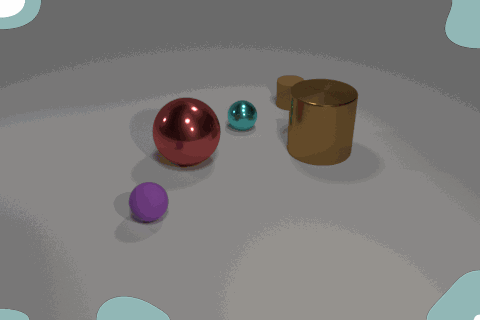

________________________________________________________________________


<ipython-input-4-5a48aae2344d>:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  matrix = imread(matrix_path)


<Figure size 640x480 with 0 Axes>

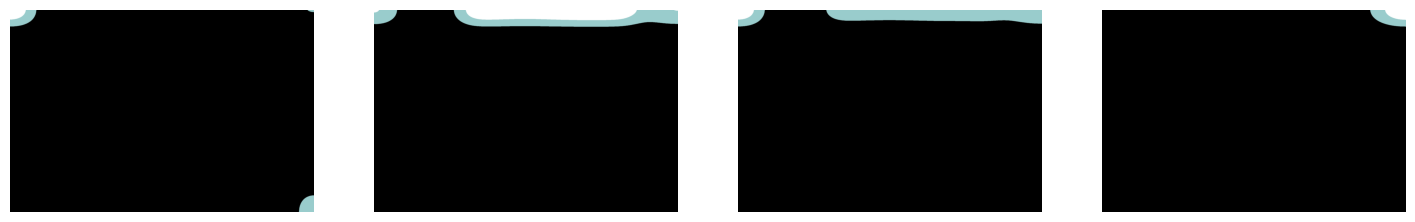

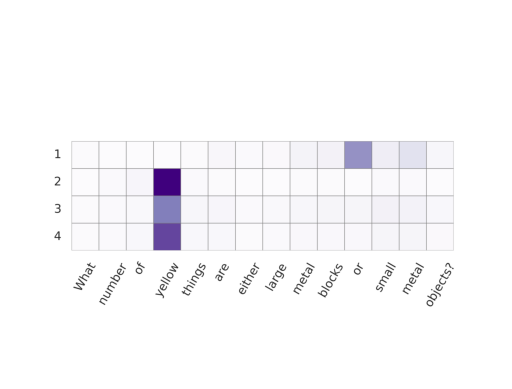

<Figure size 640x480 with 0 Axes>

In [ ]:
%run visualization.py --expName "clevrExperimentWithArg1_Len4_size60Percent" --tier val --instances 4
plt.clf()
image_split('clevrExperimentWithArg1_Len4_size60Percent','13928',1,4)
# Display the subplots
plt.tight_layout()
plt.show()

**In this example, Since we've declared the net length parameter as 16, we have 16 attention maps. i.e 16 iterations in the MAC cell**

**The question in this example is not straight forward. It involes other shapes or features from other objects in the image.**

*Are the big purple block and the big block that is on the left side of the small brown object made of the same material?*

**This is a complex question and for the mac cell to detect the answer for this, it has to find out where the small brown object is first and then from there it has to find out what's on the left side of it that is a big block then find the material of that block and finally compare it with the material of the purple cube**

## Plotting the metrics for each epoch

In [ ]:
model_8 = pd.read_csv('./results/clevrExperimentWithArg1_Len4_size20Percent/results-clevrExperimentWithArg1_Len4_size20Percent.csv',skiprows=19,index_col=0)
model_9 = pd.read_csv('./results/clevrExperimentWithArg1_Len4_size40Percent/results-clevrExperimentWithArg1_Len4_size40Percent.csv',skiprows=3,index_col=0)
model_10 = pd.read_csv('./results/clevrExperimentWithArg1_Len4_size60Percent/results-clevrExperimentWithArg1_Len4_size60Percent.csv',skiprows=1,index_col=0)

In [ ]:
model_8

,trainAcc,valAcc,trainLoss,valLoss,evalTrainAcc,evalTrainLoss,time,lr
epoch,,,,,,,,
1,0.417457,0.4556,1.134797,1.009842,0.4549,1.008219,1979.458964,0.0001
2,0.435236,0.4717,1.030954,0.971191,0.4731,0.974297,1914.809724,0.0001
3,0.443657,0.4884,1.014750,0.958620,0.4864,0.963268,1915.084641,0.0001
4,0.455307,0.5017,1.002474,0.945523,0.4904,0.956369,2244.715355,0.0001
5,0.462650,0.5133,0.990353,0.928651,0.4964,0.941111,2052.475753,0.0001
6,0.472293,0.5142,0.978827,0.913236,0.4980,0.931521,2051.186533,0.0001
7,0.481521,0.5266,0.966330,0.900924,0.5153,0.918005,2512.797425,0.0001
8,0.495507,0.5514,0.949445,0.872640,0.5343,0.892924,2121.259475,0.0001
9,0.515236,0.5760,0.923582,0.820950,0.5555,0.855423,2103.203146,0.0001


In [ ]:
model_9

,trainAcc,valAcc,trainLoss,valLoss,evalTrainAcc,evalTrainLoss,time,lr
epoch,,,,,,,,
1,0.424400,0.4647,1.080041,0.979757,0.4641,0.980756,3249.657094,0.0001
2,0.439954,0.4741,1.016515,0.969105,0.4701,0.974614,3191.086962,0.0001
3,0.448779,0.4754,1.003694,0.961740,0.4750,0.959424,3210.977459,0.0001
4,0.460004,0.4987,0.991569,0.944553,0.4900,0.948700,3106.309479,0.0001
5,0.474911,0.5235,0.974503,0.911230,0.5030,0.931381,3104.944978,0.0001
6,0.487643,0.5426,0.958111,0.882598,0.5146,0.916918,3120.968374,0.0001
7,0.514071,0.6169,0.920269,0.746266,0.5519,0.846125,3141.032920,0.0001
8,0.544164,0.6679,0.869203,0.643170,0.5792,0.796940,3204.673156,0.0001
9,0.561536,0.6920,0.836538,0.596718,0.5975,0.764170,3250.748998,0.0001


In [ ]:
model_10

,trainAcc,valAcc,trainLoss,valLoss,evalTrainAcc,evalTrainLoss,time,lr
epoch,,,,,,,,
1,0.428338,0.4668,1.061703,0.973927,0.4649,0.979422,4974.119123,0.0001
2,0.445107,0.4776,1.006921,0.959343,0.4801,0.964623,4473.053162,0.0001
3,0.463721,0.5123,0.987715,0.929858,0.4916,0.941068,5085.832937,0.0001
4,0.480648,0.5452,0.964163,0.876071,0.5107,0.919722,4224.301794,0.0001
5,0.514212,0.6409,0.913979,0.697873,0.5597,0.835971,4189.657503,0.0001
6,0.549640,0.6927,0.853648,0.597427,0.5807,0.786605,4468.961116,0.0001
7,0.477857,0.6702,0.961191,0.649985,0.5031,0.932908,4266.286999,0.0001
8,0.482421,0.6708,0.959113,0.653221,0.4981,0.926883,4605.150208,0.0001
9,0.568383,0.7144,0.822390,0.561174,0.5904,0.759699,4977.938144,0.0001


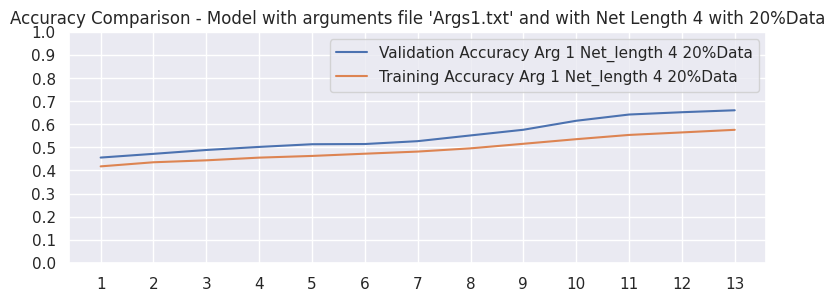

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(model_8['valAcc'],label="Validation Accuracy Arg 1 Net_length 4 20% Data")
plt.plot(model_8['trainAcc'],label="Training Accuracy Arg 1 Net_length 4 20% Data")
plt.title(label="Accuracy Comparison - Model with arguments file 'Args1.txt' and with Net Length 4 with 20% Data")
plt.xticks(model_8.index)
plt.yticks(np.arange(0,1.1,.1))
plt.legend()
plt.show()

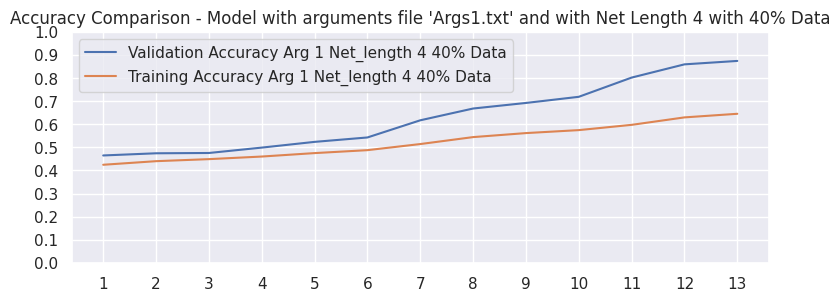

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(model_9['valAcc'],label="Validation Accuracy Arg 1 Net_length 4 40% Data")
plt.plot(model_9['trainAcc'],label="Training Accuracy Arg 1 Net_length 4 40% Data")
plt.title(label="Accuracy Comparison - Model with arguments file 'Args1.txt' and with Net Length 4 with 40% Data")
plt.xticks(model_9.index)
plt.yticks(np.arange(0,1.1,.1))
plt.legend()
plt.show()

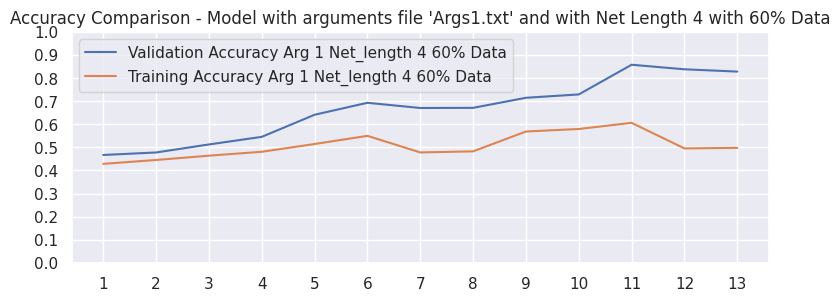

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(model_10['valAcc'],label="Validation Accuracy Arg 1 Net_length 4 60% Data")
plt.plot(model_10['trainAcc'],label="Training Accuracy Arg 1 Net_length 4 60% Data")
plt.title(label="Accuracy Comparison - Model with arguments file 'Args1.txt' and with Net Length 4 with 60% Data")
plt.xticks(model_10.index)
plt.yticks(np.arange(0,1.1,.1))
plt.legend()
plt.show()

## Best accuracy among model 8,9 and 10 is in model 9 with 87.39%

# Arguments

In [ ]:
Arguments = pd.read_excel('./weights/ArgumentsComparison.xlsx')

## Explanation

**This is the args file that we've been using in the models for training. Each of these columns represent a text file that has all these hyperparameters mentioned inside it. I've presented in a form of table for better comparison. If a model is having args4.txt in it's parameter, then it means that the model uses the hyperparameters mentioned in the args4 column while training. Similarly, Args23 is a combination of args2 and args3 in a single file that has all the arguments from one file and merges it with the unique arguments in the other file**

In [ ]:
Arguments

,ARGS,ARGS1,ARGS2,ARGS3,ARGS4
0,parallel,parallel,parallel,parallel,parallel
1,evalTrain,evalTrain,evalTrain,evalTrain,evalTrain
2,retainVal,retainVal,retainVal,retainVal,retainVal
3,useEMA,useEMA,useEMA,useEMA,useEMA
4,lrReduce,lrReduce,lrReduce,lrReduce,lrReduce
5,adam,adam,adam,adam,adam
6,clip,clip,clip,clip,clip
7,memoryVariationalDropout,memoryVariationalDropout,memoryVariationalDropout,memoryVariationalDropout,memoryVariationalDropout
8,relu=ELU,relu=ELU,relu=ELU,relu=ELU,relu=ELU
9,encBi,encBi,encBi,encBi,encBi
